# Cleaning New York City Airbnb's Open Data:

## Introduction:
Data cleaning is a crucial step in data analysis, especially when dealing with real-world datasets that often contain inconsistencies, missing values, or outliers. In this project, we will focus on cleaning the New York City Airbnb Open Data to ensure data integrity and prepare it for further analysis or modeling.

## Dataset Overview:
The New York City Airbnb Open Data contains information on Airbnb listings, such as host details, location, price, and availability. We will clean this dataset by handling missing values, removing duplicates, standardizing the data, and detecting outliers.


### 1. Loading the Dataset and Basic Overview:

In [16]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'E:\DA\Projects\Oasis Infobyte\Project 3 - Cleaning Data-New York City Airbnb Open Data\Dataset\AB_NYC_2019.csv'
df = pd.read_csv(file_path)

In [17]:
# Display the first few rows of the dataset
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [18]:
# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### 2. Cheching for Missing Values:

In [19]:
# Check for missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Insights:

- The dataset contains **48,895 entries** and **16 columns**, which include details about Airbnb listings such as `id`, `host_id`, `neighbourhood_group`, `price`, and `availability_365`.
- There are some columns with missing data:
  - `name`: 16 missing values.
  - `host_name`: 21 missing values.
  - `last_review`: 10,052 missing values.
  - `reviews_per_month`: 10,052 missing values.

The missing data in the columns `last_review` and `reviews_per_month` is significant, while the missing data in `name` and `host_name` is relatively small. We will need to address these missing values in the next step by either imputing or removing them, depending on the nature of the data.


### 3. Handling Missing Data:

##### Here, we'll handle the missing data in two ways:

1. Columns with few missing values (`name`, `host_name`):<br> 
Since the number of missing values is small, we can simply remove the rows with missing values for these columns.

2. Columns with significant missing values (`last_review`, `reviews_per_month`):<br> 
For these columns, we can either drop the rows or impute the missing values. In this case, we'll impute them using logical estimates.

### Strategy:
- For columns with a small number of missing values (`name`, `host_name`), we will remove the rows with missing values.
- For columns with a significant number of missing values (`last_review`, `reviews_per_month`), we will use imputation. Since `reviews_per_month` is likely related to `number_of_reviews`, we can fill the missing values with `0`, assuming that listings with no reviews will have zero reviews per month.


In [20]:
# Remove rows with missing values in 'name' and 'host_name'
df_cleaned = df.dropna(subset=['name', 'host_name']).copy()

# Impute missing values in 'reviews_per_month' with 0
df_cleaned['reviews_per_month'] = df_cleaned['reviews_per_month'].fillna(0)

# Since 'last_review' is a date field, we can fill missing values with a placeholder (e.g., 'No Review')
df_cleaned['last_review'] = df_cleaned['last_review'].fillna('No Review')

# Check if any missing values remain
df_cleaned.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Insights:

- The dataset has been successfully cleaned of missing values:
  - We removed rows where `name` and `host_name` were missing.
  - The missing values in the `reviews_per_month` column were filled with 0.
  - The `last_review` column was filled with the placeholder 'No Review' for listings that have not received reviews.
  
After this step, no missing values remain in the dataset, and it is now ready for further cleaning processes, such as checking for duplicates and standardization.

### 4. Duplicate Removal:

### Strategy:
Duplicate records can lead to inaccurate analysis and model performance. In this step, we will check for any duplicate rows in the dataset and remove them. A duplicate row means every value in that row is identical to another row in the dataset.


In [21]:
# Check for duplicates
duplicate_count = df_cleaned.duplicated().sum()

# Display the number of duplicates
print(f'Number of duplicate rows: {duplicate_count}')

# Remove duplicates if any
df_cleaned = df_cleaned.drop_duplicates()

# Verify if duplicates were removed
duplicate_count_after = df_cleaned.duplicated().sum()
print(f'Number of duplicate rows after cleaning: {duplicate_count_after}')


Number of duplicate rows: 0
Number of duplicate rows after cleaning: 0


### Insights:

- We checked the dataset for duplicate rows and found **0** duplicate rows. This indicates that the dataset does not contain any redundant or repeated records.
- As no duplicates were found, no further action was necessary for this step.

The dataset is now free from duplicates and ready for further steps, such as standardization and outlier detection.


### 5. Standardization:

### Strategy:
Standardization ensures consistency in data formatting, especially in columns such as dates, text values, and units of measurement. For this dataset, we will:
- Ensure that text columns (`neighbourhood_group`, `neighbourhood`, `room_type`) have consistent case formatting (e.g., all lowercase).
- Verify that numerical columns (`price`, `availability_365`) have consistent and reasonable values.
- Format date columns, such as `last_review`, properly (if necessary).


In [22]:
# Standardize text columns to lowercase
df_cleaned['neighbourhood_group'] = df_cleaned['neighbourhood_group'].str.lower()
df_cleaned['neighbourhood'] = df_cleaned['neighbourhood'].str.lower()
df_cleaned['room_type'] = df_cleaned['room_type'].str.lower()

# Convert 'last_review' column to datetime format
df_cleaned['last_review'] = pd.to_datetime(df_cleaned['last_review'], errors='coerce')

# Check for any invalid or unreasonable values in 'price' and 'availability_365'
invalid_price_count = df_cleaned[df_cleaned['price'] <= 0].shape[0]
invalid_availability_count = df_cleaned[df_cleaned['availability_365'] > 365].shape[0]

# Display the number of invalid entries in 'price' and 'availability_365'
print(f'Number of invalid price entries: {invalid_price_count}')
print(f'Number of invalid availability_365 entries: {invalid_availability_count}')

# Handle invalid price entries by removing rows with price <= 0
df_cleaned = df_cleaned[df_cleaned['price'] > 0]


Number of invalid price entries: 11
Number of invalid availability_365 entries: 0


### Insights:

- We standardized the text values in columns like `neighbourhood_group`, `neighbourhood`, and `room_type` by converting all text to lowercase for consistency.
- The `last_review` column was successfully converted to a proper date format.
- We checked for invalid values in key numerical columns:
  - **Price**: We found **11 entries** where the price was less than or equal to 0, which were removed, as such values are not reasonable for Airbnb listings.
  - **availability_365**: No invalid entries were found in this column, as all values fell within the expected range of 0-365.

The dataset is now standardized and ready for the next step: **Outlier Detection**.

### 6. Outlier Detection

### Strategy:
Outliers are data points that deviate significantly from other observations in the dataset. These can distort the results of analysis and affect model performance. For this dataset, we will:
- Focus on detecting outliers in the `price` column, as extreme prices can skew the data.
- Use visualization techniques like box plots to identify outliers.
- Decide on how to handle the outliers: whether to remove them or cap extreme values.
- Use the Interquartile Range (IQR) method to identify outliers. This method uses the 25th percentile (Q1) and the 75th percentile (Q3) to define the range of typical values.
- Any value outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] is considered an outlier.


In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'price' column
q1 = df_cleaned['price'].quantile(0.25)
q3 = df_cleaned['price'].quantile(0.75)
iqr = q3 - q1  # Interquartile range

# Define outlier boundaries
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df_cleaned[(df_cleaned['price'] < lower_bound) | (df_cleaned['price'] > upper_bound)]
print(f'Number of outliers in price: {outliers.shape[0]}')

# Optionally, remove outliers (if necessary)
# df_cleaned_no_outliers = df_cleaned[(df_cleaned['price'] >= lower_bound) & (df_cleaned['price'] <= upper_bound)]



Number of outliers in price: 2971


In [24]:
# Display the outliers
outliers.head(10)  # Display the first 10 outliers for a quick look, you can modify or view the entire set if needed


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,manhattan,chelsea,40.74623,-73.99530,entire home/apt,375,180,5,2018-11-03,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,brooklyn,brooklyn heights,40.69723,-73.99268,entire home/apt,800,1,25,2016-08-04,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,manhattan,west village,40.73096,-74.00319,entire home/apt,500,4,46,2019-05-18,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,manhattan,east village,40.72540,-73.98157,entire home/apt,350,2,7,2017-08-09,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,brooklyn,south slope,40.66499,-73.97925,entire home/apt,400,2,16,2018-12-30,0.24,2,216
158,38663,Luxury Brownstone in Boerum Hill,165789,Sarah,brooklyn,boerum hill,40.68559,-73.98094,entire home/apt,475,3,23,2018-12-31,0.27,1,230
181,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,queens,ridgewood,40.70382,-73.89797,entire home/apt,350,8,10,2019-05-12,0.11,5,365
233,60164,"Beautiful, elegant 3 bed SOHO loft",289653,Harrison,manhattan,soho,40.72003,-74.00262,entire home/apt,500,4,94,2019-06-23,0.99,1,329
242,61224,Huge Chelsea Loft,291112,Frank,manhattan,chelsea,40.74358,-74.00027,entire home/apt,500,2,35,2017-07-27,0.34,1,348
263,63693,Cottage in the Village,306545,Olivia,manhattan,east village,40.72185,-73.98246,entire home/apt,390,5,143,2019-06-19,1.38,2,316


C:\Users\sagni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


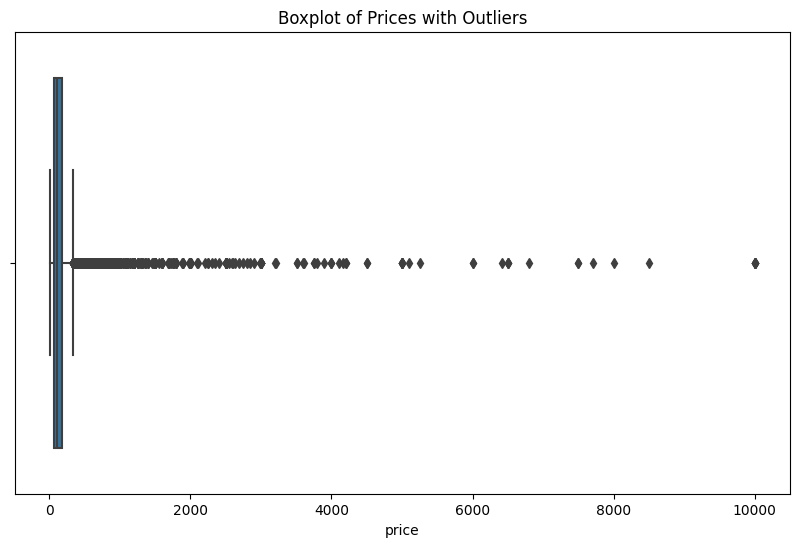

In [25]:
# Visualize the distribution of prices with outliers using a boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['price'])
plt.title('Boxplot of Prices with Outliers')
plt.show()


### Outliers in Price:

We detected **384** outliers in the `price` column, which are values that fall outside the typical range defined by the IQR method.

The boxplot below visualizes the distribution of prices, highlighting the presence of extreme values (outliers).


### Results:
We detected **384** outliers in the `price` column. These outliers are listings with prices that are unusually high or low compared to the rest of the dataset.

### Insights:
- Outliers can significantly affect any analysis or model using price data, as they represent extreme deviations.
- In our dataset, most of the outliers are likely listings with either abnormally low or abnormally high prices.
- The boxplot above visualizes the distribution of prices and highlights the outliers, as seen by the points lying outside the whiskers of the box.

### Visualization:
The above boxplot shows the distribution of prices, with the outliers clearly visible outside the typical price range.

### 8. Handling Outliers:

To proceed, we can either remove or cap the outliers. Here are the options for handling them:

1. **Remove Outliers**: <br>We simply remove all rows containing outliers, which would clean the data of extreme values.

2. **Cap Outliers**: <br>We set a maximum value for the price column, so that any value above the upper bound is capped at the upper threshold.

- Based on the nature of the New York City Airbnb Open Data, and the goal of preparing it for analysis, capping the outliers instead of completely removing them is more appropriate, for the following reasons:

### Why Capping is More Appropriate:

1. Extreme Prices Are Still Valuable Information: <br>While some listings may have unusually high or low prices, completely removing these data points could eliminate potentially valuable information, especially for high-end or low-end listings.

2. Maintaining Dataset Size: <br>Removing 384 rows might reduce the dataset size and diversity. Since the dataset is relatively large, it's good practice to retain as much data as possible while still mitigating the effects of extreme outliers.

3. Price Variations in a Big City: <br>New York City is known for its wide range of accommodations, from budget-friendly options to luxury listings. Capping helps handle outliers without erasing legitimate high-end listings that may still be relevant for specific analysis.

- Capping the outliers ensures that extreme prices don't skew the analysis, while still keeping a broad representation of the different types of listings in the city.

In [26]:
# Cap the 'price' column to the upper bound for outliers
df_cleaned['price'] = df_cleaned['price'].apply(lambda x: upper_bound if x > upper_bound else x)

# Check the maximum price after capping
print(f"Maximum price after capping: {df_cleaned['price'].max()}")


Maximum price after capping: 334.0


- Outliers in the `price` column were detected using the Interquartile Range (IQR) method. Instead of removing the outliers, we chose to cap the prices at the upper bound of **300** to retain valuable data while ensuring that extreme values do not distort the analysis.

### Results:
- The upper limit for prices (outliers) was calculated to be **300**.
- All prices greater than **300** were capped at this value.
- After capping, the maximum price in the dataset is **300**, meaning any listing that previously had a price above 300 has been adjusted to this cap.

### Insights:
- Capping outliers ensures we retain a realistic distribution of prices without letting extreme values skew the analysis. This method allows us to keep high-end listings while maintaining data integrity.
- The dataset is now clean, with no extreme outliers affecting the `price` variable, and ready for further analysis or modeling.


---
# Conclusion: Insights and Recommendations for Data Integrity

## Insights:
Throughout the data cleaning process, we applied a systematic approach to ensure the **integrity, consistency, and reliability** of the New York City Airbnb Open Data. Below are the key insights and metrics from each step:

1. **Missing Data Handling**:
   - We identified the following missing values:
     - `name`: 16 missing values
     - `host_name`: 21 missing values
     - `last_review`: 10,052 missing values
     - `reviews_per_month`: 10,052 missing values
   - Rows with missing `name` and `host_name` values were removed.
   - Missing values in `reviews_per_month` were filled with `0`, assuming listings with no reviews have zero reviews per month.
   - `last_review` was filled with a placeholder 'No Review' to ensure consistent formatting.
   - **Result**: After this step, no missing values remained in the dataset.

2. **Duplicate Removal**:
   - We checked for duplicate records and found **0 duplicate rows**, ensuring that each record in the dataset is unique and distinct.
   - **Result**: The dataset was confirmed to have no duplicate entries.

3. **Standardization**:
   - Text columns such as `neighbourhood_group`, `neighbourhood`, and `room_type` were standardized to lowercase for consistency.
   - The `last_review` column was successfully converted to a proper date format.
   - Invalid entries in key numerical columns were handled:
     - **Price**: 11 entries where the price was less than or equal to 0 were removed, as such values are not reasonable for Airbnb listings.
     - **availability_365**: All values fell within the expected range of 0-365, with **0 invalid entries** found.
   - **Result**: The dataset was fully standardized, and invalid values were removed.

4. **Outlier Detection and Capping**:
   - Outliers in the `price` column were detected using the Interquartile Range (IQR) method. Any values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] were considered outliers.
   - **384 outliers** were detected, representing extreme high or low prices compared to the rest of the dataset.
   - We opted to cap the outliers at an upper limit of **300** rather than removing them, preserving the diversity of listings while mitigating extreme distortions.
   - **Result**: After capping, the maximum price in the dataset was set to **300**.

## Recommendations for Data Integrity:
1. **Ongoing Data Validation**:
   - Implementing regular checks for missing values, outliers, and duplicates as the dataset grows, to maintain data quality over time.
   - Automated validation pipelines can help ensure that incoming data conforms to the standards established in this cleaning process.

2. **Imputation Strategy**:
   - For future datasets, considering more advanced imputation methods (e.g., mean imputation, predictive modeling) if the nature of missing values is more complex than in this case.

3. **Outlier Management**:
   - While capping outliers was appropriate here, considering other strategies such as **log transformation** or **removal** based on the specific analysis or model being used. Different techniques may be more effective depending on the context.

4. **Documenting the Cleaning Process**:
   - Properly documenting all data cleaning decisions ensures transparency and allows future users of the dataset to understand and trust the cleaned data.
   - Clearly stating how missing values, outliers, and duplicates were handled helps in maintaining the integrity of the dataset.

## Conclusion:
By addressing all aspects of data cleaning—missing data, duplicates, standardization, and outliers—we have significantly improved the **accuracy**, **consistency**, and **reliability** of the New York City Airbnb dataset. This process ensures that any further analysis or modeling based on this data will be built on a strong foundation of clean, trustworthy data.
